<h1 style="text-align: center;" markdown="1"> Generate a Dataset with Pandas </h1>


pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[Pandas Official Page](https://pandas.pydata.org/)

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib
import pandas as pd
matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
import re

from sklearn import model_selection

In [2]:
from stop_words import get_stop_words

In [4]:
ROOT_PATH=os.getcwd()

In [5]:
ROOT_PATH

'/home/dli/nlp'

### Counting Elements

In [6]:
%%time

num_lines_num  = sum(1 for line in open(ROOT_PATH + '/data/sei_6/num/sei_num'))
num_lines_ver  = sum(1 for line in open(ROOT_PATH + '/data/sei_6/ver/sei_verb'))

ratio = num_lines_num  / float(num_lines_ver) 
print('Corpus_six_num: %d, Corpus_six_ver: %d, Ratio: %0.3f' %(num_lines_num, num_lines_ver, ratio)) 

Corpus_six_num: 103484, Corpus_six_ver: 285704, Ratio: 0.362
CPU times: user 94 ms, sys: 6.16 ms, total: 100 ms
Wall time: 205 ms


### Building the Data-Frame (Balanced)

In [7]:
def load_dataset(directory_1, directory_2):
    # NOTE: Put in directory_2 the largest corpus
    data = {}
    data["sentence"] = []
    data["class"] = []
    l1 = 0
    for file_path in os.listdir(directory_1):
        with tf.gfile.GFile(os.path.join(directory_1 , file_path), "rb") as f:
                # strip() removes white spaces before and after the string
                # decode() converst a byte object ('b) in a python3 string
                list_of_sentences = [s.strip().decode() for s in f.readlines()]
                num_rows_1 = len(list_of_sentences)
                for i in range(num_rows_1):
                    data["sentence"].append(list_of_sentences[i])
                    data["class"].append(1)
    
    for file_path in os.listdir(directory_2):
        with tf.gfile.GFile(os.path.join(directory_2 , file_path), "rb") as f:
                # strip() removes white spaces before and after the string
                # decode() converst a byte object ('b) in a python3 string
                list_of_sentences = [s.strip().decode() for s in f.readlines() if np.random.random() <= ratio]
                num_rows_1 = len(list_of_sentences)
                for i in range(num_rows_1):
                    data["sentence"].append(list_of_sentences[i])
                    data["class"].append(0)

    return pd.DataFrame.from_dict(data)

In [8]:
%%time
directory_1 = ROOT_PATH + '/data/sei_6/num/'
directory_2 = ROOT_PATH + '/data/sei_6/ver/'

dataset_df = load_dataset(directory_1, directory_2)

CPU times: user 1.35 s, sys: 14.5 ms, total: 1.37 s
Wall time: 1.64 s


### Some Checks

In [9]:
# Check Balanced
dataset_df.groupby('class').count()

,sentence
class,
0,103891
1,103484


In [10]:
# Print some samples
for i in range(10):
    print(dataset_df.iloc[i]['sentence'])
    print(dataset_df.iloc[-i -1]['sentence'])

a al comma dopo le parole inferiore a sei
whoa whoa whoa sei cifre
a anni accoltellò all'addome jimmy davis un bambino di sei anni e lo nascose nei
warner bros ha comprato il mio libro per sei cifre
a anni da del mondo e con l'uscita al primo turno da sei slam
sono sei cifre
a anni e sei mesi dalla
sei denunce per furto d auto in due delle quali si dichiara
a anni passa nelle giovanili del milan dove trascorre sei stagioni laureandosi per due volte
sei cifre quello che mi serve
a a sei
sei cifre per la lettura
a a sei minuti dal
sei cifre non mi serviva altro
aa vv sei secoli di musica nel duomo
sei cifre in piu  del nostro ricevimento di nozze
a balaustra e sei gruppi di scalini che su ambedue i lati conducono verso la città
sei cifre ecco qua
a baltimora nel maryland il più giovane di sei figli
robin ha un tris di jack james ha poco meno di una coppia di sei


In [11]:
dataset_df.head(5)

,sentence,class
0,a al comma dopo le parole inferiore a sei,1
1,a anni accoltellò all'addome jimmy davis un ba...,1
2,a anni da del mondo e con l'uscita al primo tu...,1
3,a anni e sei mesi dalla,1
4,a anni passa nelle giovanili del milan dove tr...,1


In [12]:
dataset_df.tail(5)

,sentence,class
207370,sei cifre quello che mi serve,0
207371,sei denunce per furto d auto in due delle qual...,0
207372,sono sei cifre,0
207373,warner bros ha comprato il mio libro per sei c...,0
207374,whoa whoa whoa sei cifre,0


### Statistics about the dataset

In [12]:
# Counting number of words and mean
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).mean()

sentence    8.390515
class       1.000000
dtype: float64

In [13]:
# Max length sentence
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).max()

sentence    24
class        1
dtype: int64

In [14]:
# Max length sentence
dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1).std()

sentence    3.599363
class       0.000000
dtype: float64

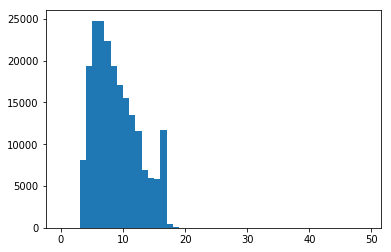

In [15]:
# Histogram of the lengths
%matplotlib inline

length_sentence = dataset_df.astype('str').applymap(lambda x: str(x).count(' ') + 1)
plt.hist(length_sentence['sentence'],bins=range(50))
plt.show()

### Shuffle the Dataset

In [17]:
index = [i for i in range(dataset_df.shape[0])]
random.shuffle(index)
dataset = dataset_df.set_index([index]).sort_index()

dataset.head(10)

,sentence,class
0,è sul mercato da oltre sei mesi,1
1,primitivo così i sei discendenti,1
2,sei anche un mercenario,0
3,onestamente sara ripensando a quello che hai p...,1
4,sei un agente validissimo pearce,0
5,tu sei il superuomo nella base,0
6,fratellino sei innamorato,0
7,e poi quando sei nato charles ha detto che eri...,0
8,hai guidato per sei stati nella direzione sbag...,1
9,ci sei arrivata da sola,0


### Some other cleaning...

In [18]:
exclude1 = ['\t', '"', '?'] # list
exclude2 = ["'", "  ", "   ", "    ", "     "] # list

def clean_text(text):
    for c in exclude1:
        text=text.replace(c,'')
    for c in exclude2:
        text=text.replace(c, " ")
    return text.lower().strip()

sentence_processed = list(map(clean_text, dataset['sentence'].values))

dataset['sentence'] = sentence_processed

dataset.head(10)

,sentence,class
0,è sul mercato da oltre sei mesi,1
1,primitivo così i sei discendenti,1
2,sei anche un mercenario,0
3,onestamente sara ripensando a quello che hai p...,1
4,sei un agente validissimo pearce,0
5,tu sei il superuomo nella base,0
6,fratellino sei innamorato,0
7,e poi quando sei nato charles ha detto che eri...,0
8,hai guidato per sei stati nella direzione sbag...,1
9,ci sei arrivata da sola,0


## Split for Tagger Classifier (Train, Valid)

In [19]:

splitter =  model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=19850610)

splits = list(splitter.split(X=dataset['sentence'], y=dataset['class']))
train_index = splits[0][0]
valid_index = splits[0][1]

train_df = dataset.loc[train_index,:]
print('Training-Set size: %d' %len(train_df))

valid_df = dataset.loc[valid_index,:]
print('Validation-Set size: %d' %len(valid_df))

Training-Set size: 176268
Validation-Set size: 31107


In [42]:
print("Training Set")
training_value_counts = train_df['class'].value_counts()
print(training_value_counts)
print("class 0 %: {}".format(round(training_value_counts[0]/len(train_df)*100,2)))
print("class 1 %: {}".format(round(training_value_counts[1]/len(train_df)*100,2)))
print("")
print("Validation Set")
validation_value_counts = valid_df['class'].value_counts()
print(validation_value_counts)
print("class 0 %: {}".format(round(validation_value_counts[0]/len(valid_df)*100,2)))
print("class 1 %: {}".format(round(validation_value_counts[1]/len(valid_df)*100,2)))

Training Set
0    88103
1    87961
Name: class, dtype: int64
class 0 %: 50.04
class 1 %: 49.96

Validation Set
0    15548
1    15523
Name: class, dtype: int64
class 0 %: 50.04
class 1 %: 49.96


In [22]:
! mkdir tsvfiles

In [23]:
train_df.to_csv(os.path.join(ROOT_PATH, 'tsvfiles/train_data.tsv'), header=False, index=False, sep='\t')
valid_df.to_csv(os.path.join(ROOT_PATH, 'tsvfiles/valid_data.tsv'), header=False, index=False, sep='\t')

## Calculate Vocabulary and Save it

Stop Words are commond words that if you want you can remove from your vocabulary (it is not mandatory but it could be a choice). The idea behind is the folloing. Suppose you want to build a topic detector, i.e. an algorithm that is able to identify the topic of a sentence. Is the sentence talking about history or physics? For this kind of task words like 'the', 'which', 'however' are not really important for the classification. We can choose to remove them and insert them into stop words (words that we do not put inside our vocabulary). On the contrary, words like 'centuries', 'battle' or 'gravity' and 'magnetism' must be present inside our vocabulary.

In [20]:
stop_words = get_stop_words('italian') + get_stop_words('english')

my_stop_words = []
for my_word in my_stop_words:
    stop_words.append(my_word)
    
# Important step for this dataset!!!!
stop_words.remove('sei')

In [27]:

# This function returns FALSE if there is a digit in the string (i.e '4mmm', 'm44m', 'llp4')
#falseIfDigit = lambda word: not bool((re.match('^(?=.*[0-9])', str(word))))

def get_vocab():
    #allWords = []
    vocab = set()
    for text in train_df['sentence'].values:
        words = text.split(' ')
        # remove digits
        words_only = [w for w in words if not w.isdigit()]
        words_ = [w for w in words_only if len(w) > 0 ]
        word_set = set(words_)
        vocab.update(word_set)
    
    #vocab.remove('')
    return list(vocab)

def get_all_words():
    allWords = []
    cnt = 0
    for text in train_df['sentence'].values:
        words = text.split(' ')
        # remove digits
        words_only = [w for w in words if not w.isdigit()]
        words_ = [w for w in words_only if len(w) > 0 ]
        allWords = allWords + words_
        cnt += 1
        if cnt%10000==0:
            print('-----------', cnt)
    
    return allWords



In [28]:
%%time
vocab = get_vocab()
print('--------------------', len(vocab))


-------------------- 64006
CPU times: user 820 ms, sys: 2 µs, total: 820 ms
Wall time: 820 ms


In [30]:
%%time
allWords = get_all_words()
print('--------------------', len(allWords))

----------- 10000
----------- 20000
----------- 30000
----------- 40000
----------- 50000
----------- 60000
----------- 70000
----------- 80000
----------- 90000
----------- 100000
----------- 110000
----------- 120000
----------- 130000
----------- 140000
----------- 150000
----------- 160000
----------- 170000
-------------------- 1522514
CPU times: user 44min 42s, sys: 596 ms, total: 44min 43s
Wall time: 44min 44s


In [31]:
from collections import Counter
cnt_allWords = Counter(allWords)

In [32]:
vocab_words_sorted_by_appearence = sorted(cnt_allWords.items(), key=lambda kv: len(vocab) - kv[1])
#vocab_words_sorted_by_appearence

In [33]:
vocab_words_sorted_by_appearence_list = [word[0] for word in vocab_words_sorted_by_appearence]
#vocab_words_sorted_by_appearence_list, len(vocab_words_sorted_by_appearence_list)


In [54]:
STOP_WORDS = False
REDUCED_SIZE_VOC = True
SIZE_VOC = 25000

vocab = vocab_words_sorted_by_appearence_list

if STOP_WORDS:
    vocab = [w for w in vocab if w not in stop_words]
    words_and_frequence = [ (word, freq) for (word, freq) in vocab_words_sorted_by_appearence if word not in stop_words]

print(len(vocab))
if REDUCED_SIZE_VOC:
    vocab = vocab[0:SIZE_VOC]
print(len(vocab))


64006
25000


In [55]:
PAD_WORD = '#=KS=#'

PATH_VOC = os.path.join(ROOT_PATH, 'tsvfiles/vocab_5k.tsv')
with open(PATH_VOC , 'w') as file:
#with open('/home/asr/Data/classif_task/jsgf_data/vocab_list.tsv', 'w') as file:
    file.write("{}\n".format(PAD_WORD))
    for word in vocab:
        file.write("{}\n".format(word))
        
PATH_WORDS = os.path.join(ROOT_PATH, 'tsvfiles/n_words_5k.tsv')        
with open(PATH_WORDS, 'w') as file:
#with open('/home/asr/Data/classif_task/jsgf_data/n_words.tsv', 'w') as file:
    file.write(str(len(vocab)))

